<a href="https://colab.research.google.com/github/danielhawkridge-essence/colab-notebooks/blob/main/2-diamonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OK, now we've got the basics down let's do some data science!

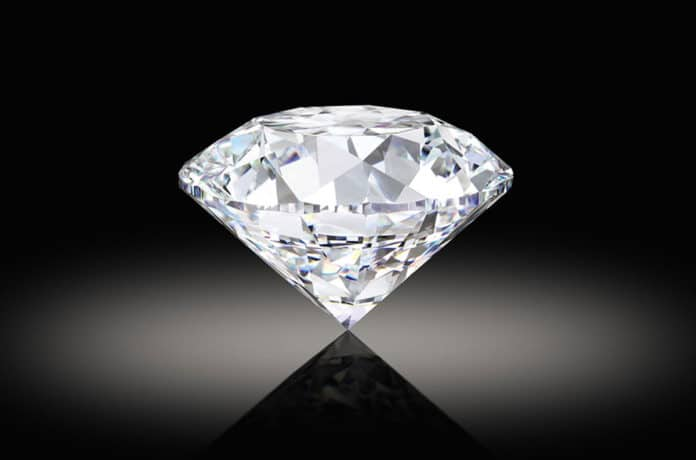

Let's revisit the diamonds example. Let's say we're a diamond buyer, and want to know how much we should be paying for a specific diamond.

Let's first pull up the data, and have a look at the table

In [ ]:
import seaborn
import pandas as pd
pd.options.mode.chained_assignment = None  
import numpy as np
import matplotlib.pyplot as plt
data = seaborn.load_dataset('diamonds')
data

OK, we have a lot of data here! 9 columns and ~54000 rows. Let's explore what each column means

First carat, the weight/size of the diamond:

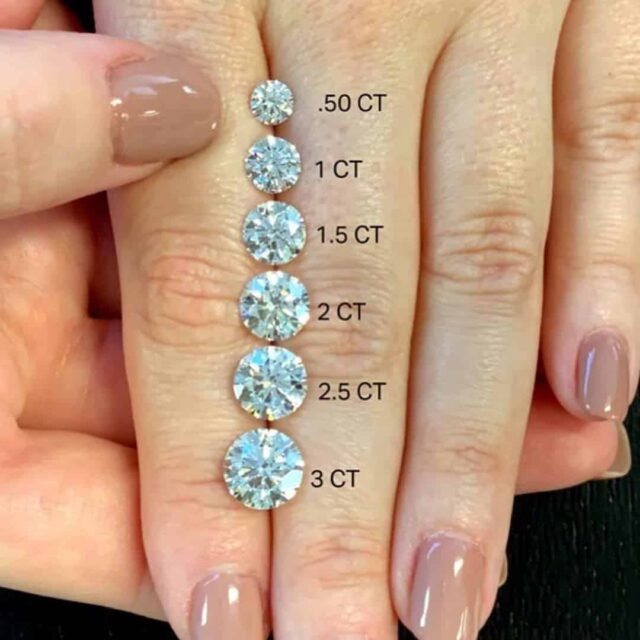

In [ ]:
#carat is the weight
data['carat'].describe()

Cut, how well was the diamond cut by the manafacturer:

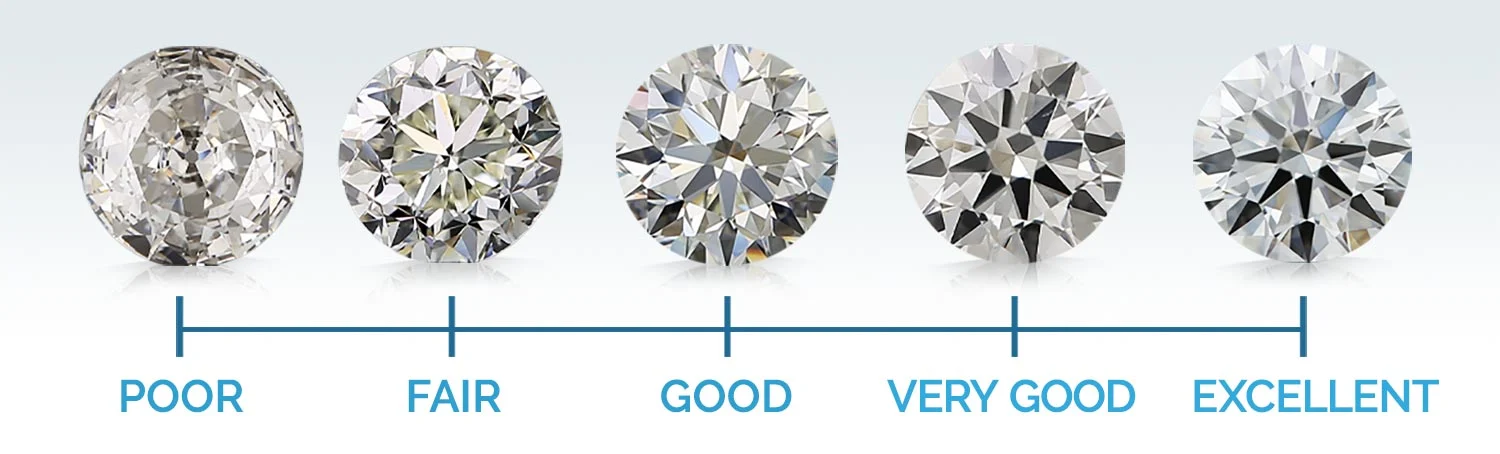

In [ ]:
#cut is how well the diamond has been cut, fair, good, very good, premium and ideal
data['cut'].unique()

Colour - not all diamonds are colourless:

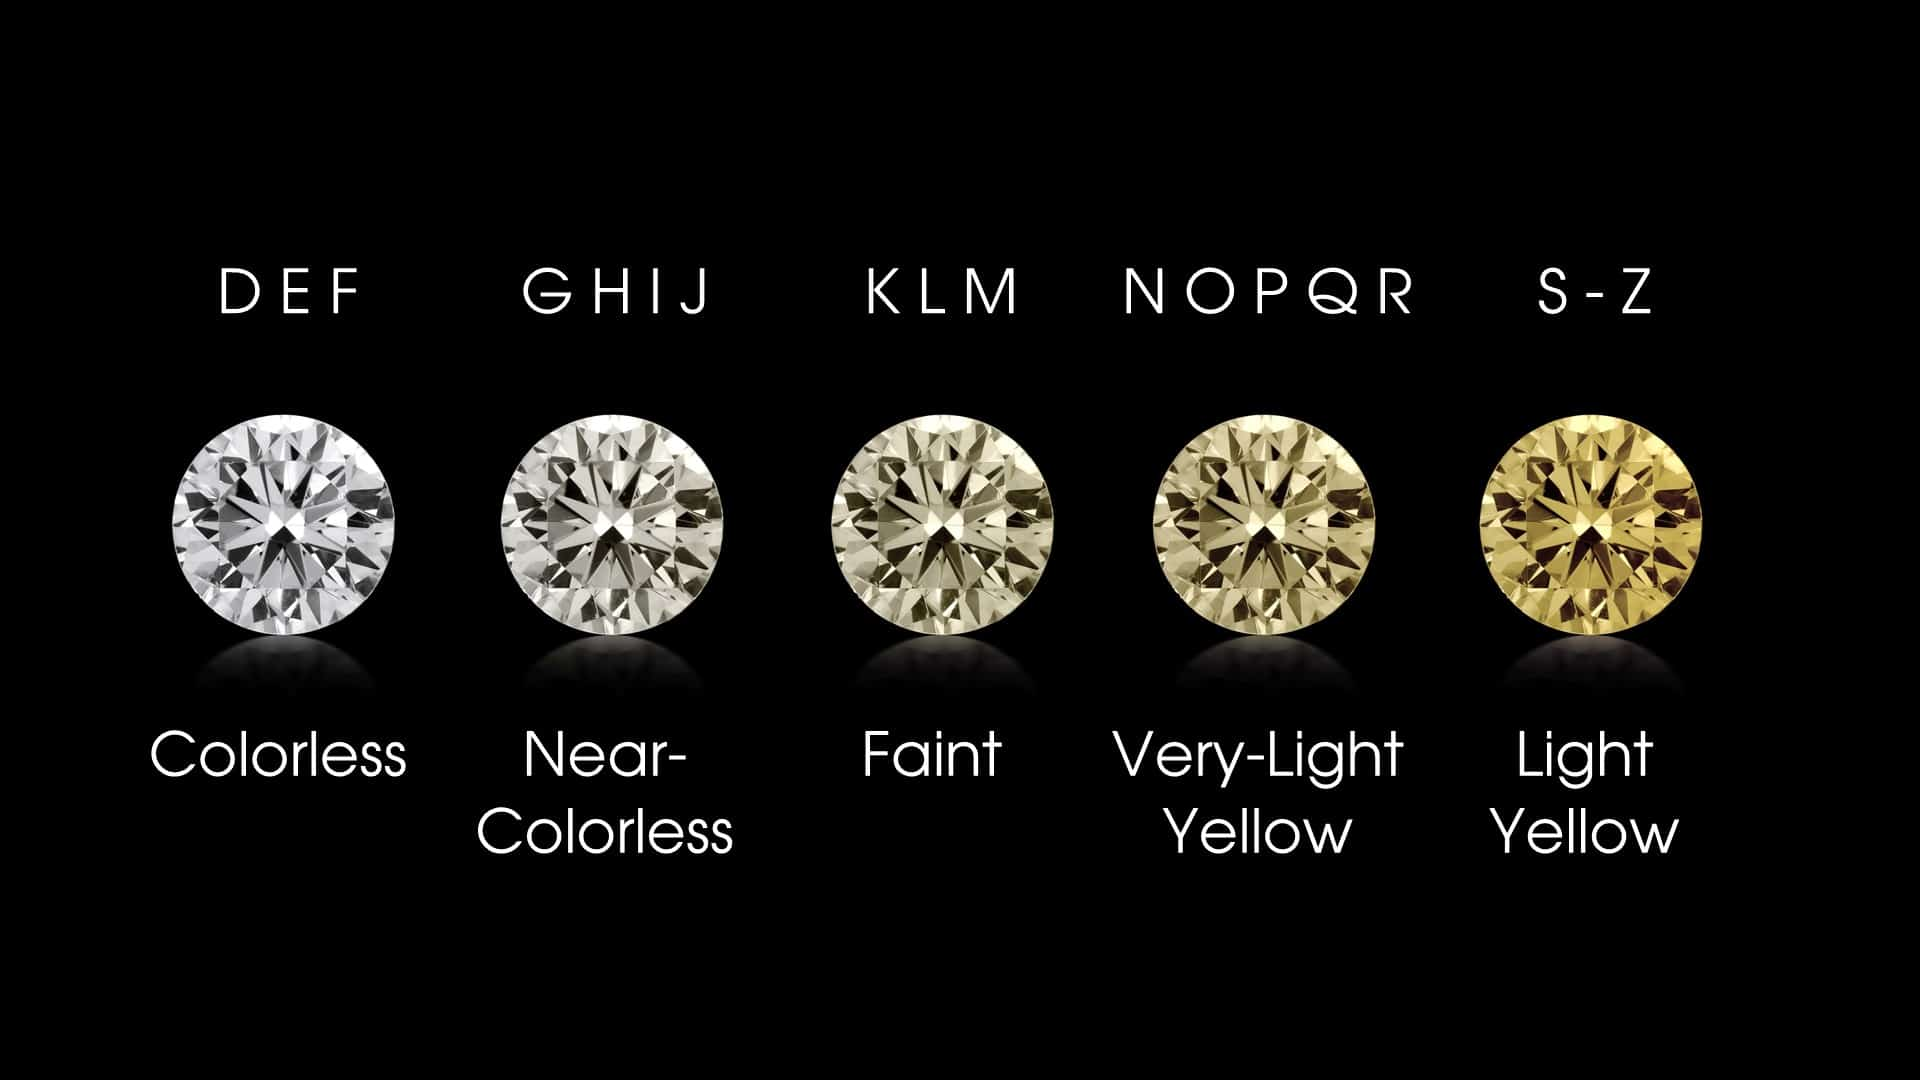

In [ ]:
#colour (note US spelling!) is the diamond colour

In [ ]:
data['color'].unique()

Clarity, diamonds have other things in them:

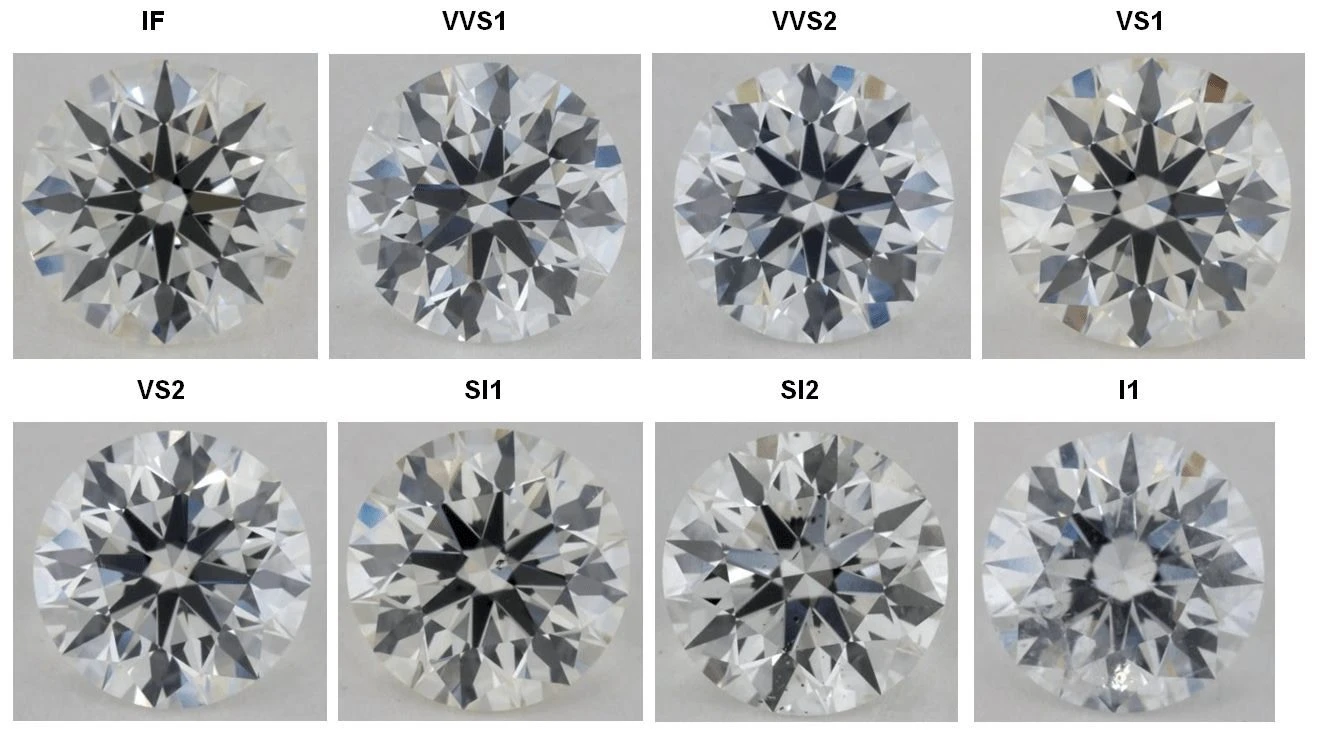

In [ ]:
#clarity is how many interal flaws there are in a diamond
data['clarity'].unique()

Table + depth:

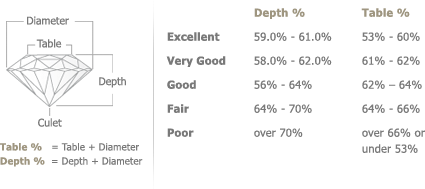

In [ ]:
#both are percentages and represent sizing ratios
data[['depth', 'table']].describe()

In [ ]:
# x,y,z are physical sizes of the diamond - we're not going to use these for now
data[['x', 'y', 'z']].describe()

In [ ]:
#let's import some machine learning packages to build the model
import xgboost as xgb
from sklearn import preprocessing

In order to make our models work we need to transform the categoric data in cut, colour, and clarity to numbers. We're not telling the model which one is better or worse (it'll work that out!), just transforming a word into a number:

In [ ]:
cut_encoder = preprocessing.LabelEncoder()
color_encoder = preprocessing.LabelEncoder()
clarity_encoder = preprocessing.LabelEncoder()
data['cut_encoded'] = cut_encoder.fit_transform(data['cut'])
data['color_encoded'] = color_encoder.fit_transform(data['color'])
data['clarity_encoded'] = clarity_encoder.fit_transform(data['clarity'])

In [ ]:
data

In order for us to see if our model has worked, we're gonig to split our data into 2 - one set of the data is our training set. This will be fed into the model where it will attempt to learn patterns. The other data is the training set, unseen data where we'll ask the model to predict and see how good it is.

Our data is split into x and y data. y data is what you want to predict - in this case the price of the diamond, and x data is the information we have to build a prediction

Think of the training data as everything you learn in class, and the test data as the exam at the end of the year...

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['cut','color','clarity','price','x','y','z'])
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


The next cell initalises, runs the model and predicts a result. You fit the model on the x and y training data, then run a prediction just on the x test data. y_hat is the predicted result!

In [ ]:
model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(X_train.values, y_train)
y_hat = model.predict(X_test.values)
y_hat

You've just run your first machine learning code - well done! Let's merge X_test, y_test, and y hat together:

In [ ]:
results = X_test.copy()
results['price'] = y_test
results['predicted_price'] = y_hat
results

We can now see how close our predicted price was to the actual price. We'll calcuate the absolute percentage error and take the average so we can see how accurate we are overall:

In [ ]:
results['abs_percentage_error'] = np.abs(results['price'] - results['predicted_price'])/results['price']
results

In [ ]:
results['abs_percentage_error'].mean()

I've got 11.7%, but your value might be a little better or worse - many models use methods with randomness to get to a good answer faster.

Let's sense check our model now. We're going to loop through cut, colour, clarity and carat sizes whilst keeping all the other data the same. We're going to do this by taking a row of X_test data, and editing it. 

You're the data scientist here - do the results make sense? Would **you trust this model** to buy diamonds for you? Have a look at the images above to help, or look at Google - does it make sense?


In [ ]:
#let's create an avaerage sample, so that we can vary other
master_sample = X_test.mean()
master_sample['cut_encoded'] = master_sample['cut_encoded'].astype(int)
master_sample['color_encoded'] = master_sample['color_encoded'].astype(int)
master_sample['clarity_encoded'] = master_sample['clarity_encoded'].astype(int)
master_sample['carat'] = 1 #
master_sample

In [ ]:
#which cut is worth the most? Let's loop through
x = []
y = []
print("Cut analysis")
for n in cut_encoder.classes_:
  cut = cut_encoder.transform([n])[0]
  sample = master_sample.copy()
  sample['cut_encoded'] = cut
  x.append(n)
  y.append(model.predict(sample).max())

chart = seaborn.barplot(x=x,y=y)
plt.ylabel("Cost")
plt.xlabel("Cut")
plt.title("Cut and cost")
for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
        
plt.show()

In [ ]:
#which colour is worth the most? Let's loop through
x = []
y = []
print("Colour analysis")
for n in color_encoder.classes_:
  color = color_encoder.transform([n])[0]
  sample = master_sample.copy()
  sample['color_encoded'] = color
  x.append(n)
  y.append(model.predict(sample).max())

chart = seaborn.barplot(x=x,y=y)
plt.ylabel("Cost")
plt.xlabel("Colour")
plt.title("Colour and cost")
for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
        
plt.show()

In [ ]:
#which clarity is worth the most? Let's loop through
x = []
y = []
print("Clarity analysis")
for n in clarity_encoder.classes_:
  clarity = clarity_encoder.transform([n])[0]
  sample = master_sample.copy()
  sample['clarity_encoded'] = clarity
  x.append(n)
  y.append(model.predict(sample).max())

chart = seaborn.barplot(x=x,y=y)
plt.ylabel("Cost")
plt.xlabel("Clarity")
plt.title("Clarity and cost")
for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

In [ ]:
#what about carat?
print("Carat analysis")
x = []
y = []
for n in np.linspace(0.1,2, 10):
  sample['carat'] = n
  x.append(n)
  y.append(model.predict(sample).max())

chart = seaborn.lineplot(x=x,y=y)
plt.ylabel("Cost")
plt.xlabel("Carat")
plt.title("Carat and cost")
plt.show()
